 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610) </b> </h1> </center>

<b> Programming Assignment - 06 - Isolated digit recognition using Hidden Markov Model (HMM) </b>

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Assignment on Hidden Markov Models </b> <br>
We expect you to learn to build HMMs in this programming assignment. The skeleton code is provided for you to understand the algorithm. In the later part of the assignment, you need to build an N state HMM to perform isolated digit recognition task\. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.




**Part 1): Understanding the parameters of the Hidden Markov Model (HMM)**

In this part of the assignment, you will understand the functionality of the different parameters of the Hidden Markov Model (HMM). Specifically, we will sample the observations from the HMM model with different parameters to understand their influence. Let us consider the 4-state HMM with 2D observations and assume that the states of the HMM follow the Gaussian distribution. 
 
1. **Understanding the functionality of transition matrix** : 

  i. Change the transition matrix of the HMM i.e skipping some transitions, having different strengths for particular state transitions, etc 

  ii. Sample the sequence of observations with the original and altered transition matrix and plot them

  iii. Write your obervations for each case in the report. 

2. **Understanding the functionality of emission probability** : 

  i. Change the mean of the Gaussian in each state of the HMM i.e means as conrners of sqaures  etc.

  ii. Change covariance matrix of the Gaussian in each state of the HMM i.e Isotropic, diagonal, full etc. 

  ii. Sample the sequence of observations with the original and altered Gausian distribution and plot them
  
  iii. Write your obervations for each case in the report.

In [43]:
#All imports
# !pip install hmmlearn
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import librosa

# %matplotlib notebook

States:- [0 1 2 3]
Count:- [103 130 195  72]


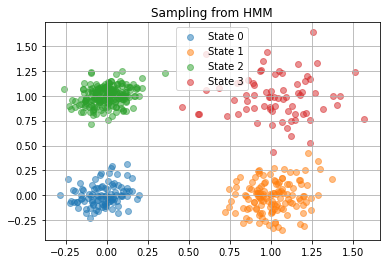

In [57]:
#You can use the built in hmm functions to generate the samples
#Set different types of transition matrix as initialization and generate the observations
#Let us use the four state hmm

#Set the prior probabilities. Note: It should follow the axioms of probability.
startprob = np.array([0.25, 0.25, 0.2, 0.3])

#Initialize the mean of the Gaussian in each state ( four states with single gaussian ) 
means = np.array([ [0, 0] , [1, 0] , [0, 1] , [1, 1] ])

#Initialize the covariance of the Gaussians in each state 
covars = np.array([[[0.01, 0.002], [0.002, 0.01]], [[0.02, 0.002], [0.002, 0.02]],
                   [[0.01, 0.002], [0.002, 0.01]], [[0.05, 0.002], [0.002, 0.05]]]) 

#Initialize the transition matrix of the HMM 
transmat = np.array([[0.5, 0.2, 0.1, 0.2], [0.1, 0.5, 0.2, 0.2], [0.05, 0.1 ,0.8, 0.05], [0.4, 0.2, 0.2, 0.2]]) 

def gen_samples_hmm(startprob, means, covars, transmat, L=500):
    #Build an HMM instance 
    model = hmm.GaussianHMM(n_components=4, covariance_type="full") #hmm.HMMGMM() for replacing the single Gaussian with the Mixture of Gaussians

    # Set the above parameters in hmm model ( ) 
    model.startprob_ = startprob
    model.transmat_ = transmat
    model.means_ = means
    model.covars_ = covars


    # Sample observation sequence of 500 length from the HMM model
    X, Z = model.sample(L)
    
    return X, Z

X, Z = gen_samples_hmm(startprob, means, covars, transmat)

x, y = np.unique(Z, return_counts=True) 
print("States:-", x)
print("Count:-", y)

plt.figure()
plt.title('Sampling from HMM')
for i in range(4):
    idx = Z == i
    plt.scatter(X[idx, 0], X[idx, 1], label='State {}'.format(i), alpha=0.5)
# plt.ylim((-2, 2))
plt.legend()
plt.grid()
plt.show() 

## Effect of transition matrix

Transition matrix:-
 [[0.5  0.2  0.1  0.2 ]
 [0.1  0.5  0.2  0.2 ]
 [0.05 0.1  0.8  0.05]
 [0.4  0.2  0.2  0.2 ]]
States:- [0 1 2 3]
Count:- [ 99 123 209  69]


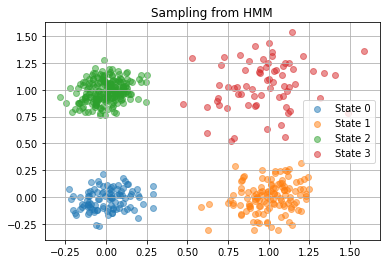

In [58]:
t1 = np.array([[0.5, 0.2, 0.1, 0.2], [0.1, 0.5, 0.2, 0.2], [0.05, 0.1 ,0.8, 0.05], [0.4, 0.2, 0.2, 0.2]]) 

X, Z = gen_samples_hmm(startprob, means, covars, t1)

print("Transition matrix:-\n", t1)

x, y = np.unique(Z, return_counts=True) 
print("States:-", x)
print("Count:-", y)

plt.figure()
plt.title('Sampling from HMM')
for i in range(4):
    idx = Z == i
    plt.scatter(X[idx, 0], X[idx, 1], label='State {}'.format(i), alpha=0.5)
plt.legend()
# plt.ylim((-2, 2))
plt.grid()
plt.show()

Transition matrix:-
 [[0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]]
States:- [0 1 2]
Count:- [  1   1 998]


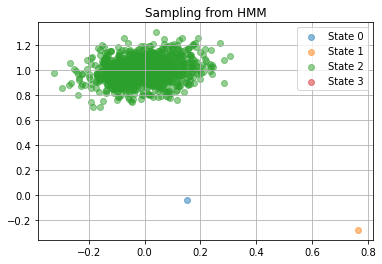

In [59]:
startprob = np.array([1, 0, 0, 0])

t2 = np.array([[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1, 0, 0, 0]]) 

X, Z = gen_samples_hmm(startprob, means, covars, t2, L=1000)

print("Transition matrix:-\n", t2)

x, y = np.unique(Z, return_counts=True) 
print("States:-", x)
print("Count:-", y)

plt.figure()
plt.title('Sampling from HMM')
for i in range(4):
    idx = Z == i
    plt.scatter(X[idx, 0], X[idx, 1], label='State {}'.format(i), alpha=0.5)
plt.legend()
# plt.ylim((-2, 2))
plt.grid()
plt.show()

Transition matrix:-
 [[0.5 0.3 0.1 0.1]
 [0.  0.5 0.4 0.1]
 [0.  0.  0.9 0.1]
 [0.  0.  0.  1. ]]
States:- [0 1 2 3]
Count:- [  2   1   3 994]


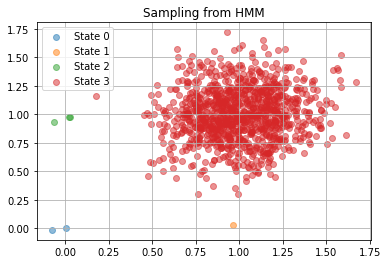

In [60]:
t3 = np.array([[0.5, 0.3, 0.1, 0.1], [0, 0.5, 0.4, 0.1], [0, 0, 0.9, 0.1], [0, 0, 0, 1]]) 

X, Z = gen_samples_hmm(startprob, means, covars, t3, L=1000)

print("Transition matrix:-\n", t3)

x, y = np.unique(Z, return_counts=True) 
print("States:-", x)
print("Count:-", y)

plt.figure()
plt.title('Sampling from HMM')
for i in range(4):
    idx = Z == i
    plt.scatter(X[idx, 0], X[idx, 1], label='State {}'.format(i), alpha=0.5)
plt.legend()
# plt.ylim((-2, 2))
plt.grid()
plt.show()

## Effect of emission probability

Covariance:-
[[[0.001 0.   ]
  [0.    0.001]]

 [[0.001 0.   ]
  [0.    0.001]]

 [[0.001 0.   ]
  [0.    0.001]]

 [[0.001 0.   ]
  [0.    0.001]]]

States:- [0 1 2 3]
Count:- [ 76 125 243  56]


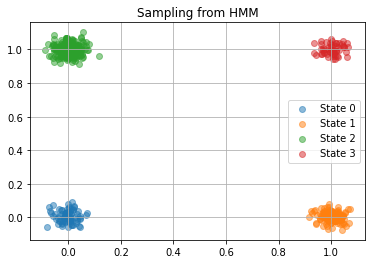

In [63]:
startprob = np.array([0.25, 0.25, 0.25, 0.25])
X, Z = gen_samples_hmm(startprob, means, covars, transmat)

print('Covariance:-')
print(covars)

x, y = np.unique(Z, return_counts=True) 
print("\nStates:-", x)
print("Count:-", y)

plt.figure()
plt.title('Sampling from HMM')
for i in range(4):
    idx = Z == i
    plt.scatter(X[idx, 0], X[idx, 1], label='State {}'.format(i), alpha=0.5)
# plt.ylim((-2, 2))
plt.legend()
plt.grid()
plt.show() 

Covariance:-
[[[0.001 0.   ]
  [0.    0.001]]

 [[0.001 0.   ]
  [0.    0.001]]

 [[0.001 0.   ]
  [0.    0.001]]

 [[0.001 0.   ]
  [0.    0.001]]]

States:- [0 1 2 3]
Count:- [174 166 536 124]


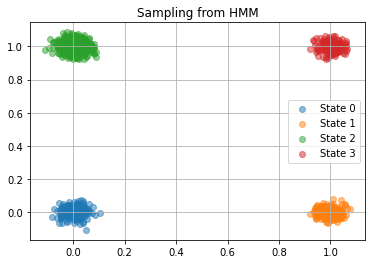

In [64]:
covars = np.array([[[1e-3, 0], [0, 1e-3]], [[1e-3, 0], [0, 1e-3]],
                   [[1e-3, 0], [0, 1e-3]], [[1e-3, 0], [0, 1e-3]]]) 

X, Z = gen_samples_hmm(startprob, means, covars, transmat, L=1000)

print('Covariance:-')
print(covars)


x, y = np.unique(Z, return_counts=True) 
print("\nStates:-", x)
print("Count:-", y)

plt.figure()
plt.title('Sampling from HMM')
for i in range(4):
    idx = Z == i
    plt.scatter(X[idx, 0], X[idx, 1], label='State {}'.format(i), alpha=0.5)
plt.legend()
# plt.ylim((-2, 2))
plt.grid()
plt.show()

**Part 2): Isolated Digit Recognition**

In this part of assignment you have to implement the isolated digit recognition system using HMM.
1. Record 5 to 10 repetition each of digits zero,one,two,three,four,five,six,seven,eight and nine (for testing on recorded data). (The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes.)
2. Compute MFCC features ( sequence of observations). (The codes to compute the signal's templates ( Mel Frequency Cepstral Coefficients ) are provided. Please use them to obtain the templates of the speech signals.)
3. Train a N state HMM model for each digit and store the model
3. Compute the probability of generating test observation sequence given the trained model of the digits. P(O/λw)
4. Get the predicted label from P(O/λw) where 0<=w<=9
5. Repeat the above experiment by increasing number of states (N) in word HMM ranging from 5 to 15. Report your accuracy and observations.
6. Repeat the above experiment with varying the number of states across the digits i.e you may use large number of states for large digits. Report the accuracy and observations.
7. Experiment with GMM and Single Gaussian for both single speaker ( recorded  ) and multiple speakers ( provided ) digits data base. Write the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts and report your analysis in the report section.
7. Create a confusion matrix and report the most confusing digits.
8. Compare the performance with that obtained using DTW algorithm (in previous assignment).

[link to multi speaker digit data base](https://drive.google.com/drive/folders/1faRFWAkGA8tEm_g5VbDyZCvmsn05CWT6?usp=sharing)

**Code to compute the signal's templates i.e Mel Frequency Cepstral Coefficients**

In [4]:
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy
import scipy.io.wavfile as wav
def MFCC(wavfile):
  ###########################
  # Input  : Signal of length t
  # Output : Templates of size (T,30) where T is the number of frames and 30 is dimension of the feature for each frame
  ###########################
  (rate,sig) = wav.read(wavfile)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=30,winlen=0.025,winstep=0.01,nfilt=30,lowfreq=20,highfreq=7600,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  return mfcc_feat_cmvn

**Write a function to train Hidden Markov Model (HMM) and return the trained models**

In [ ]:
def hmm(TrainingDataset):
    #Input trainng dataset
    #Output trained HMM models
    #You may use "hmm.GMMHMM" or "hmm.GaussianHMM" function and fit method to train the models 
    #Experiment with GMM and Single Gaussian for both single speaker ( recorded  ) and multiple speakers ( provided ) digits data base. 



    #Return the trained model

    

**Write a function to perform isolated digit recognition**

In [ ]:
def TrainTestSplit(datadir,TrainPercentage): 
    #Takes input as the data set location and percentage of training data to be used




    #Compute MFCC features ( delta and delta+delta ) ( you can use built in functions )




    #Return the data set 







In [ ]:
def IsolatedDigitRecognition():
    trainDir = '/content/drive/MyDrive/datadir/' #Location to your data directory in google drive
    #Load data from the data directory ( use TrainTestSplit function to get separate splits )
    Train_data, Test_data = TrainTestSplit() # Pass the arguments


    #Train HMM models for all the digits ( zero,one,two,three,four,five,six,seven,eight,nine and ten )



    #Testing 
    #Iterate through the test data set



      #Extract the features for test speech signal



      #Compute the probability of generating sequece of observations ( test speech signal MFCC features ) given the trained hmm models of the digits p(O/Trained word model)



      #Get the digit model achieving highest probability in generating the sequence




  # We have original labels of the test data and predicted labels from the Hidden Markov Models (HMM)
  # Compute the test accuracy and report in the observations

  

In [ ]:
# Confusion matrix





**Report**

1.

2.

3.